# Neural Network with one hidden layer

<center><img src="images/04-Neural Network with one hidden layer/one-hidden-layer.png" width = "400px"></center>

### Table of Contents

* [Recap](#chapter0)
* [1. Load the Dataset - Cat vs Dog](#chapter1)
    * [1.1 Load the Dataset](#section_1_1)
    * [1.2 Display the Data](#section_1_2)
    * [1.3 Flatten the data](#section_1_3)
    * [1.4 Normalize the data](#section_1_4)
* [2. Neural Network Model](#chapter2)
    * [2.1 Functions of our Neural Network ](#section_2_1)
        * [2.1.1 Layer Sizes](#section_2_1_1)
        * [2.1.2 Initialize Parameters](#section_2_1_2)
        * [2.1.3 Forward Propagation](#section_2_1_3)
        * [2.1.4 Cost function](#section_2_1_4)
        * [2.1.5 Backward Propagation](#section_2_1_5)
        * [2.1.6 Update parameters](#section_2_1_6)
    * [2.2 Model](#section_2_2)
* [3. ](#chapter3)


# Recap  <a class="anchor" id="chapter0"></a>

> Input layer :

$$ n_X = features \ | \ m = examples$$ 
$$X = \begin{bmatrix}  X^{(1)} &  X^{(2)} & .. & .. &  X^{(m)} \end{bmatrix}  \in  \mathbb{R^{n_X \times m}}$$  
$$ X^{(i)} \ \ i_{th} \ \ example $$

> Parameters :

$$ W^{[1]} \in (n_{[1]} \times n_X) $$ 
$$ b^{[1]} \in (n_{[1]} \times 1) $$ 
$$ W^{[2]} \in (n_{[2]} \times n_{[1]}) $$ 
$$ b^{[2]} \in (n_{[2]} \times 1) $$ 

In our case n[2] = 1 :

- One output unit

> Forward Propagation :

$$
\begin{cases}
    Z^{[1]} = W^{[1]} X + b^{[1]} \\
    A^{[1]} = g^{[1]}(Z^{[1]})  \\
    Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} \\
    A^{[2]} = g^{[2]}(Z^{[2]})
\end{cases}
$$

- g is the activation function

> Backward Propagation :

- W[i] and dW[i] have the same dimension
- b[i] and db[i] have the same dimension
- Z[i] and dZ[i] have the same dimension

$$
\begin{cases}
    dZ^{[2]} =  (A^{[2]} - Y) \\
    dW^{[2]} = \frac{1}{m} (A^{[2]} - Y)A^{[1]T} \\
    db^{[2]} = \frac{1}{m} \sum (A^{[2]} - Y)    \\
    dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{[1]'}(Z^{[1]}) \\
    dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T\\
    db^{[1]} = \frac{1}{m} \sum  dZ^{[1]}
\end{cases}
$$

In this jupyter Notebook we will:

- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh
- Compute the cross entropy loss
- Implement forward and backward propagation


In [1]:
# Packages
import copy
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

%matplotlib inline

# 1. Load the Dataset - Cat vs Dog <a class="anchor" id="chapter1"></a>

## 1.1 Load the Dataset <a class="anchor" id="section_1_1"></a>

In [3]:
# !pip install h5py

In [46]:
# function load data
import h5py

def load_data():
    train_dataset = h5py.File('datasets/02 - cat vs dog/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/02 - cat vs dog/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [47]:
# load data

X_train, y_train, X_test, y_test = load_data()

In [48]:
# Shape

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1000, 64, 64)
X_test shape: (200, 64, 64)
y_train shape: (1000, 1)
y_test shape: (200, 1)


In [49]:
# Data distribution

print("y_train Distribution",np.unique(y_train,return_counts=True))

y_train Distribution (array([0., 1.]), array([500, 500], dtype=int64))


The data are equally distributed.

## 1.2 Display the data  <a class="anchor" id="section_1_2"></a>

In [50]:
def display_data(X,y,n):
    """
    Display n random image in the dataset X,y

    ----
    Inputs:
    - X : Matrix containing the features and the examples
    - y : True label of the dataset X
    - n : number of images plot
    """
    # Random range
    random_range = np.random.randint(0,X.shape[0],size=n)

    # Classes
    classes = {0: "cat",1:"dog"}

    fig, axs = plt.subplots(1, n, figsize=(10, 3))
    
    for i in range(n):
        ax = axs[i]
        ax.imshow(X[i],cmap="gray")
        ax.set_title(f"y={y[i,0]} | {classes[y[i,0]]}".capitalize())
    
       

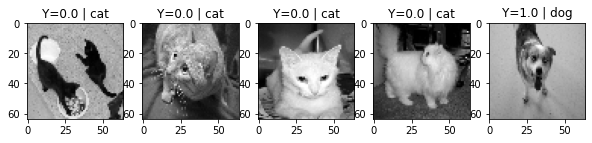

In [51]:
display_data(X_train,y_train,5)

## 1.3 Flatten the data <a class="anchor" id="section_1_3"></a>

$$ X \in (n_X \times m)$$

- n_x features
- m examples

In [52]:
# Flatten

X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
X_test_flatten =  X_test.reshape(X_test.shape[0],-1).T

print("X_train flatten:", X_train_flatten.shape)
print("X_test flatten:", X_test_flatten.shape)

X_train flatten: (4096, 1000)
X_test flatten: (4096, 200)


## 1.4 Normalize the data <a class="anchor" id="section_1_4"></a>

In [53]:
X_train_flatten_norm = X_train_flatten/np.max(X_train_flatten)

# Warning: the data are normalized with the Training set
X_test_flatten_norm = X_test_flatten/np.max(X_train_flatten)

In [55]:
# Transpose y_train and y_test for our neural network 

y_train = y_train.T
y_test = y_test.T

# 2. Neural Network Model <a class="anchor" id="chapter2"></a>

## 2.1 Functions of our Neural Network <a class="anchor" id="section_2_1"></a>

### 2.1.1 Layer Sizes <a class="anchor" id="section_2_1_1"></a>

In [56]:
def layer_sizes(X,y,number_hidden_units):

    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0]
    n_y = y.shape[0]
    n_h = number_hidden_units

    return n_x, n_y, n_h

In [57]:
# Test 

layer_sizes(X_train_flatten_norm, y_train, number_hidden_units=5)

(4096, 1, 5)

### 2.1.2 Initialize Parameters <a class="anchor" id="section_2_1_2"></a>

In [58]:
def initialize_parameters(n_x, n_y, n_h):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    

    # Initialize W1 and b1 
    W1 = np.random.randn(n_h,n_x) *0.01
    b1 = np.zeros((n_h,1))

    # Initializa W2 and b2
    W2 = np.random.randn(n_y,n_h) *0.01
    b2 = np.zeros((n_y,1))

    params = {"W1": W1,"W2": W2, "b1": b1, "b2": b2}
    return params

In [59]:
# test initialize parameters
n_x,n_y,n_h = 400, 1, 5
param_test = initialize_parameters(n_x, n_y, n_h)

print("W1 shape:", param_test["W1"].shape)
print("W2 shape:", param_test["W2"].shape)
print("b1 shape:", param_test["b1"].shape)
print("b2 shape:", param_test["b2"].shape)

W1 shape: (5, 400)
W2 shape: (1, 5)
b1 shape: (5, 1)
b2 shape: (1, 1)


### 2.1.3 Forward Propagation <a class="anchor" id="section_2_1_3"></a>

In [60]:
def activation_function(Z,function_name):

    if function_name == "tanh":
        A=np.tanh(Z)
    elif function_name == "sigmoid":
        A = 1/(1+np.exp(-Z))

    return A

In [61]:
def forward_propagation(X,parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
   
    
    Returns:
    forward_prog -- python dictionary containing the activations
    
    """
    # Getting weights and bias
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Activation using tanh as activation function
    
    # Layer 1 : activation function -> tanh
    Z1 = np.dot(W1,X) + b1
    A1 = activation_function(Z1,"tanh")

    # Layer 2 activation function -> sigmoid
    Z2 = np.dot(W2,A1) + b2
    A2 = activation_function(Z2,"sigmoid")

    # forward results
    cache = {"Z1":Z1, "A1":A1, "Z2":Z2,"A2": A2}

    return cache

In [62]:
#-----------------------------
# TEST forward propagation

# initialize layers and examples
n_x,n_y,n_h = 400, 1, 5
m = 1000
X = np.random.randn(n_x,m)

# initialize parameters
param_test = initialize_parameters(n_x, n_y, n_h)

# forward propagation test
forward_cache = forward_propagation(X,param_test)

print(forward_cache["A1"].shape)
print(forward_cache["A2"].shape)


(5, 1000)
(1, 1000)


### 2.1.4 Cost function <a class="anchor" id="section_2_1_4"></a>

In [63]:
def cost_function(A2,y, parameters):
    """
    Computes the binary cross-entropy 
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation 

    """
    m = y.shape[1]

    # Compute the cost

    cost = -(1/m) * (np.dot(y,np.log(A2).T) + np.dot(1-y,np.log(1-A2).T))


    return np.squeeze(cost)

In [64]:
# -----------------------
# Test cost function

# initialize layers and examples
n_x,n_y,n_h = 400, 1, 5
m = 1000
X = np.random.randn(n_x,m)
y = np.random.randint(0,2,(1,m))

# initialize parameters
param_test = initialize_parameters(n_x, n_y, n_h)

# forward propagation test
forward_cache = forward_propagation(X,param_test)
A2 = forward_cache["A2"]

# cost
cost = cost_function(A2,y,param_test)
cost_log_loss = log_loss(y.T,A2.T)

print("cost :", cost)
print("cost log_loss:",cost_log_loss)

cost : 0.693115801821032
cost log_loss: 0.693115801821032


### 2.1.5 Backward Propagation <a class="anchor" id="section_2_1-5"></a>

In [65]:
def backward_propagation(X,y,parameters,forward_cache):

    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    gradients -- python dictionary containing your gradients with respect to different parameters
    """
    # m examples
    m = y.shape[1]

    # Getting forward elem
    A2 = forward_cache["A2"]
    A1 = forward_cache["A1"]

    # getting parameters
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Compute the gradient
    dZ2 = A2 - y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    
    # g(z) = tanh(z) = a(z) | g'(z) = 1 - g²(z) = 1 - a²
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1,2)) 
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)


    gradients ={"dW1": dW1,
                "db1": db1,
                "dW2": dW2,
                "db2": db2}
    

    return gradients

### 2.1.6 Update parameters <a class="anchor" id="section_2_1_6"></a>

In [66]:
def update_params(parameters,gradients, learning_rate=0.1):

    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    # parameters
    W_1 = parameters["W1"]
    W_2 = parameters["W2"]
    b_1 = parameters["b1"]
    b_2 = parameters["b2"]

    # gradients
    dW1 = gradients["dW1"]
    dW2 = gradients["dW2"]
    db1 = gradients["db1"]
    db2 = gradients["db2"]

    # update
    W1 = W_1 - learning_rate * dW1
    W2 = W_2 - learning_rate * dW2
    b1 = b_1 - learning_rate * db1
    b2 = b_2 - learning_rate * db2

    # parameters
    params = {"W1": W1,"W2": W2, "b1": b1, "b2": b2}

    return params

In [67]:
def predict(parameters,X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (dog: 0 / cat: 1)
    """

    # forward propagation
    cache = forward_propagation(X,parameters)

    # prediction
    predictions = cache["A2"]

    predictions[predictions >= 0.5] = 1
    predictions[predictions < 0.5] = 0

    return predictions

## 2.2 Model  <a class="anchor" id="section_2_2"></a>

In [68]:
def neural_network_model(X,y,n_h,n_iter,learning_rate=0.01,display_learning=False):

    """
    ONE HIDDEN LAYER NEURAL NETWORK MODEL

    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    n_iter -- Number of iterations in gradient descent loop
    learning_rate -- learning_rate of gradient descent
    display_learning -- if True, print the learning every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # Tracking
    cost = []
    acc = []

    # n_x,n_h
    n_x,n_y,n_h =layer_sizes(X,y,n_h)

    # m example
    m = X.shape[1]

    # Initaliaze parameters
    parameters = initialize_parameters(n_x,n_y,n_h)

    for i in range(n_iter):

        # --- Forward propagation ---
        forw_cache = forward_propagation(X,parameters)

        # --- Cost ---
        A2 = forw_cache["A2"]
        cost_res = cost_function(A2,y,parameters)
        cost.append(cost_res)
    
        y_pred = predict(parameters,X)

        acc_res = accuracy_score(y.T,y_pred.T)
        acc.append(acc_res)
        
        # --- Backward propagation ---
        gradients = backward_propagation(X,y, parameters, forw_cache)

        # --- Update parameters ---
        parameters = update_params(parameters, gradients, learning_rate=learning_rate)

        if display_learning is True and i%100 == 0:
            print(f"iter {i} : Train_Loss = {cost_res}, Train_acc = {acc_res}")


    dict_nn = {"cost":cost,"accuracy":acc,"parameters":parameters}

    return dict_nn

In [73]:
# Training

Training_res = neural_network_model(X_train_flatten_norm,y_train,5,5000,learning_rate=0.01,display_learning=True)

iter 0 : Train_Loss = 0.693205906200426, Train_acc = 0.484
iter 100 : Train_Loss = 0.6930024932877621, Train_acc = 0.503
iter 200 : Train_Loss = 0.6928073628272727, Train_acc = 0.502
iter 300 : Train_Loss = 0.6925661614464385, Train_acc = 0.505
iter 400 : Train_Loss = 0.6922236825837262, Train_acc = 0.513
iter 500 : Train_Loss = 0.6917047926514039, Train_acc = 0.527
iter 600 : Train_Loss = 0.690910992566972, Train_acc = 0.545
iter 700 : Train_Loss = 0.6897200839410349, Train_acc = 0.575
iter 800 : Train_Loss = 0.6880030982586964, Train_acc = 0.59
iter 900 : Train_Loss = 0.6856582830874245, Train_acc = 0.603
iter 1000 : Train_Loss = 0.6826351017145996, Train_acc = 0.596
iter 1100 : Train_Loss = 0.6789340668653188, Train_acc = 0.601
iter 1200 : Train_Loss = 0.6745946064370506, Train_acc = 0.607
iter 1300 : Train_Loss = 0.6696854804429154, Train_acc = 0.619
iter 1400 : Train_Loss = 0.6642811684514707, Train_acc = 0.62
iter 1500 : Train_Loss = 0.6584182656965797, Train_acc = 0.641
iter 160

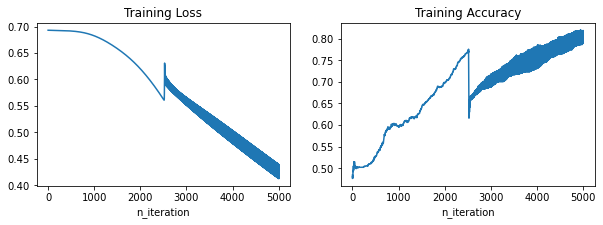

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(Training_res["cost"])
axs[0].set_title("Training Loss")
axs[0].set_xlabel("n_iteration")

axs[1].plot(Training_res["accuracy"])
axs[1].set_title("Training Accuracy")
axs[1].set_xlabel("n_iteration")
plt.show()

# 3. Training on an other DATASET

In [75]:
dataset_file = "datasets/01 - cat/"

def load_dataset():

    # Training set
    train_dataset = h5py.File(dataset_file + "train_catvnoncat.h5","r")
    X_train = np.array(train_dataset["train_set_x"][:])
    y_train = np.array(train_dataset["train_set_y"][:])

    # Test set
    test_dataset = h5py.File(dataset_file + "test_catvnoncat.h5","r")
    X_test = np.array(test_dataset["test_set_x"][:])
    y_test = np.array(test_dataset["test_set_y"][:])

    # classes
    classes = np.array(test_dataset["list_classes"][:])

    return X_train, y_train, X_test, y_test, classes

In [77]:
# split

train_x,train_y, test_x, test_y,classes = load_dataset()

In [79]:
# Display Shape
print("X_train shape:", train_x.shape)
print("X_test shape:", test_x.shape)
print("y_train shape:", train_y.shape)
print("y_test shape:",test_y.shape)
print("classes shape:",classes.shape)

X_train shape: (209, 64, 64, 3)
X_test shape: (50, 64, 64, 3)
y_train shape: (209,)
y_test shape: (50,)
classes shape: (2,)


In [80]:
# We need to reshape y_train and y_test

train_y = train_y.reshape((1,train_y.shape[0]))
test_y = test_y.reshape((1,test_y.shape[0]))

print("y_train shape:", train_y.shape)
print("y_test shape:",test_y.shape)

y_train shape: (1, 209)
y_test shape: (1, 50)


In [81]:
# Flatten

train_x_flat = train_x.reshape(train_x.shape[0],-1).T
test_x_flat = test_x.reshape(test_x.shape[0],-1).T


print("X_train flatten shape:",train_x_flat.shape)
print("X_test flatten shape:",test_x_flat.shape)

X_train flatten shape: (12288, 209)
X_test flatten shape: (12288, 50)


In [82]:
# Normalize

train_x_flat_norm = train_x_flat/np.max(train_x_flat)

# Warning: the data are normalized with the Training set
test_x_flat_norm = test_x_flat/np.max(train_x_flat)

In [86]:
dico_training = neural_network_model(train_x_flat_norm,train_y,5,3000,learning_rate=0.0075,display_learning=True)

iter 0 : Train_Loss = 0.6935324937929473, Train_acc = 0.40669856459330145
iter 100 : Train_Loss = 0.6562858542101794, Train_acc = 0.6555023923444976
iter 200 : Train_Loss = 0.6453919677502244, Train_acc = 0.6555023923444976
iter 300 : Train_Loss = 0.638822450538501, Train_acc = 0.6555023923444976
iter 400 : Train_Loss = 0.6218415894855164, Train_acc = 0.6555023923444976
iter 500 : Train_Loss = 0.5942282253607012, Train_acc = 0.6555023923444976
iter 600 : Train_Loss = 0.5562908248446765, Train_acc = 0.7272727272727273
iter 700 : Train_Loss = 0.5106243920082945, Train_acc = 0.7894736842105263
iter 800 : Train_Loss = 0.4600027712870968, Train_acc = 0.84688995215311
iter 900 : Train_Loss = 0.4079272978529507, Train_acc = 0.8947368421052632
iter 1000 : Train_Loss = 0.4222461084855104, Train_acc = 0.861244019138756
iter 1100 : Train_Loss = 0.3760168314722615, Train_acc = 0.8708133971291866
iter 1200 : Train_Loss = 0.33736440865432127, Train_acc = 0.8803827751196173
iter 1300 : Train_Loss = 0

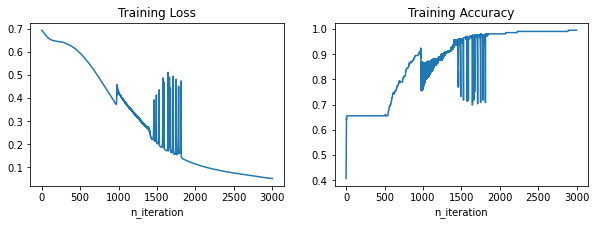

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(dico_training["cost"])
axs[0].set_title("Training Loss")
axs[0].set_xlabel("n_iteration")

axs[1].plot(dico_training["accuracy"])
axs[1].set_title("Training Accuracy")
axs[1].set_xlabel("n_iteration")
plt.show()